# Part 1: Import Necessary Libraries/Utilities

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras.applications import VGG16, VGG19
from keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import cv2
from glob import glob
import random

from numpy.random import seed
seed(100)
from tensorflow import set_random_seed
set_random_seed(101)

from keras.utils import print_summary

import seaborn as sns
sns.set()

import datetime
import time
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

original_start = datetime.datetime.now()


Using TensorFlow backend.


In [2]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'
custom_test_dir = '../input/asl-alphabet-test/asl-alphabet-test/'



In [3]:
classes = [folder[len(train_dir):] for folder in glob(train_dir + '/*')]

In [4]:
#sanity check
classes = sorted(classes)
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

# Part 2: Load Data and Visualizing Data/EDA

This is one method to load all data and perform train/test/split - we'll use this first because it's easier to coerce this into a dataframe and look at the class distribution by utilizing pandas:

In [15]:


labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

def load_data(base_path):
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM: ", end=" ")
    for folder in os.listdir(base_path):
        print(folder, end = " | ")
        for image in os.listdir(base_path + '/' + folder):
            temp_img = cv2.imread(base_path + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            if folder == 'A':
                labels.append(labels_dict['A'])
            elif folder == 'B':
                labels.append(labels_dict['B'])
            elif folder == 'C':
                labels.append(labels_dict['C'])
            elif folder == 'D':
                labels.append(labels_dict['D'])
            elif folder == 'E':
                labels.append(labels_dict['E'])
            elif folder == 'F':
                labels.append(labels_dict['F'])
            elif folder == 'G':
                labels.append(labels_dict['G'])
            elif folder == 'H':
                labels.append(labels_dict['H'])
            elif folder == 'I':
                labels.append(labels_dict['I'])
            elif folder == 'J':
                labels.append(labels_dict['J'])
            elif folder == 'K':
                labels.append(labels_dict['K'])
            elif folder == 'L':
                labels.append(labels_dict['L'])
            elif folder == 'M':
                labels.append(labels_dict['M'])
            elif folder == 'N':
                labels.append(labels_dict['N'])
            elif folder == 'O':
                labels.append(labels_dict['O'])
            elif folder == 'P':
                labels.append(labels_dict['P'])
            elif folder == 'Q':
                labels.append(labels_dict['Q'])
            elif folder == 'R':
                labels.append(labels_dict['R'])
            elif folder == 'S':
                labels.append(labels_dict['S'])
            elif folder == 'T':
                labels.append(labels_dict['T'])
            elif folder == 'U':
                labels.append(labels_dict['U'])
            elif folder == 'V':
                labels.append(labels_dict['V'])
            elif folder == 'W':
                labels.append(labels_dict['W'])
            elif folder == 'X':
                labels.append(labels_dict['X'])
            elif folder == 'Y':
                labels.append(labels_dict['Y'])
            elif folder == 'Z':
                labels.append(labels_dict['Z'])
            elif folder == 'space':
                labels.append(labels_dict['space'])
            elif folder == 'del':
                labels.append(labels_dict['del'])
            elif folder == 'nothing':
                labels.append(labels_dict['nothing'])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    templabels = labels
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
    
    print()
    print('Loaded', len(X_train), 'images for training', 'Train Data Shape', X_train.shape)
    print('Loaded', len(X_test), 'images for testing', 'Test Data Shape', X_test.shape)
    
    return X_train, X_test, y_train, y_test, templabels

LOADING DATA FROM:  T | J | A | P | C | F | X | R | O | G | V | W | Y | Z | U | D | L | Q | K | N | H | B | S | E | I | space | del | M | nothing | 
Loaded 78300 images for training Train Data Shape (78300, 64, 64, 3)
Loaded 8700 images for testing Test Data Shape (8700, 64, 64, 3)


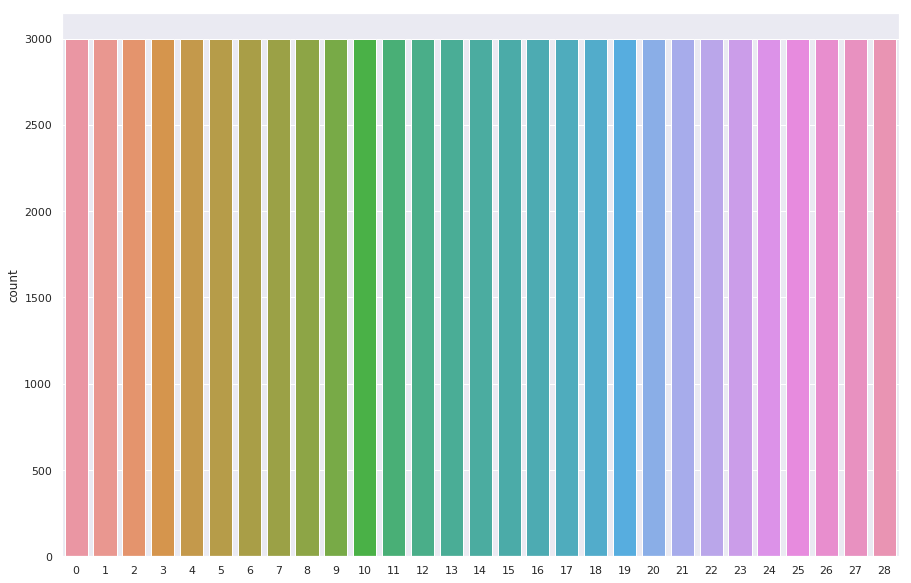

In [16]:
X_train, X_test, y_train, y_test, labels = load_data(train_dir)

new_df = pd.DataFrame()
new_df["labels"] = labels
values = new_df["labels"].value_counts
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(labels)

LOADING DATA FROM:  T | J | A | P | C | F | X | R | O | G | V | W | Y | Z | U | D | L | Q | K | N | H | B | S | E | I | space | del | M | nothing | 
Loaded 783 images for training Train Data Shape (783, 64, 64, 3)
Loaded 87 images for testing Test Data Shape (87, 64, 64, 3)


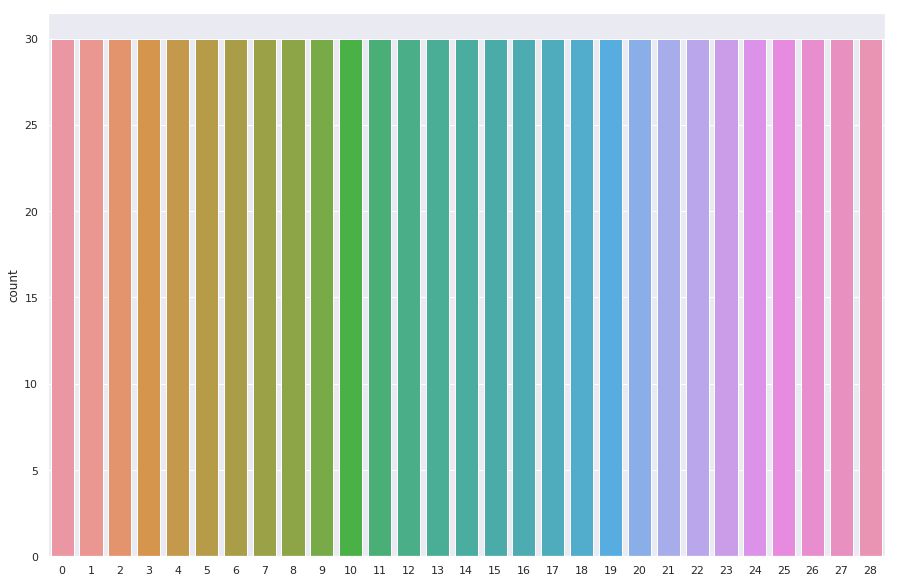

In [17]:
X_train, X_test, y_train, y_test, labels = load_data(custom_test_dir)

new_df = pd.DataFrame()
new_df["labels"] = labels
values = new_df["labels"].value_counts
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(labels)

Great! We have a perfectly balanced training set with 3000 images for each label and perfectly balanced test set with 30 images for each label.

Below we'll create a helper function to plot a random image from each set of data that we have so we can inspect what the images look like.

In [5]:
def plot_one_sample_of_each(base_path):
    cols = 5
    rows = int(np.ceil(len(classes)/cols))
    fig = plt.figure(figsize=(16,20))
    
    imgs_for_plot = []
    labels_for_plot = []
    for i in range(len(classes)):
        cls = classes[i]
        labels_for_plot.append(cls)
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
        
        img = random.sample(path_contents, 1)
        imgs_for_plot.append(img)
        
        sp = plt.subplot(rows, cols, i+1)
        plt.imshow(cv2.imread(img[0]))
        plt.title(cls)
        sp.axis('off')
        
    plt.show()
    return imgs_for_plot, labels_for_plot
    

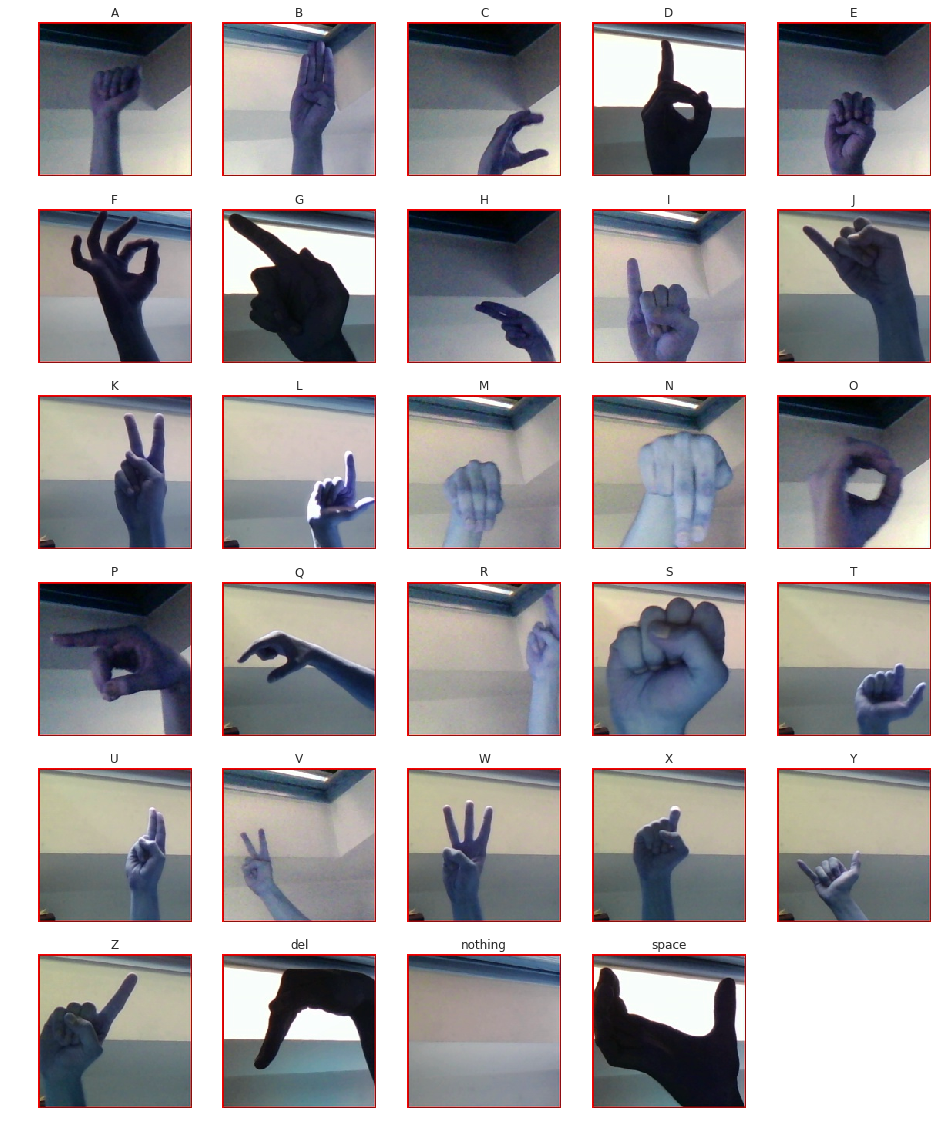

In [6]:
train_sample_imgs, train_labels = plot_one_sample_of_each(train_dir)

This is a sample of the training data.  We can see that the images are all produced in a similar environment: against a drab wall, low light, appears to be the same hand.  There are shadows present in some images so that presents some variance to an otherwise relatively static background.

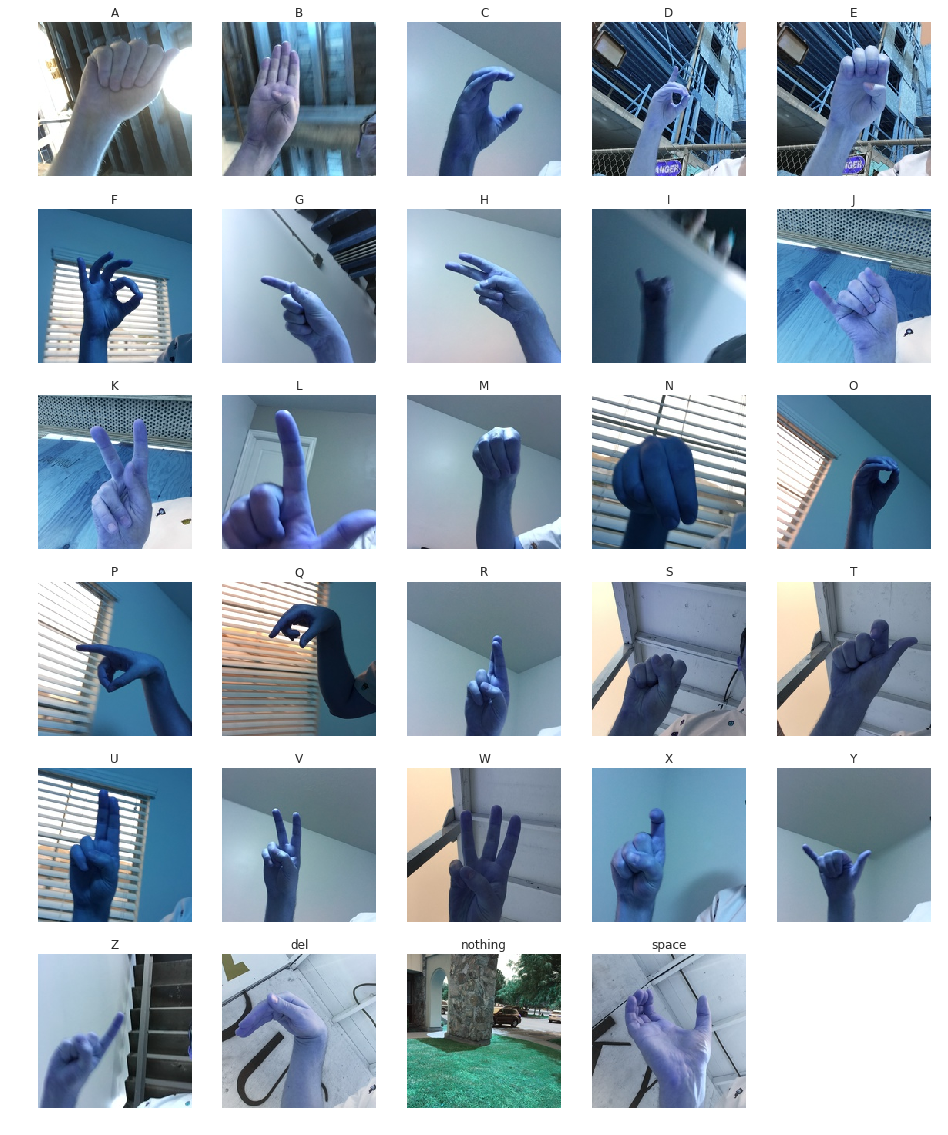

In [7]:
test_sample_imgs, test_labels = plot_one_sample_of_each(custom_test_dir)

This is a completely different set of images that has much more variety in the backgrounds, lighting and hues.  This should present a significant challenge once we've trained a network on the training data.  We'll use this as our true test data to evaluate how robust the model is at identifying the actual signs using "real-world" data.

In [8]:
len(test_sample_imgs)

29

In [9]:
len(train_sample_imgs)

29

Helper function to get image dimensions:

In [10]:
def get_img_size(img_path):
    img = cv2.imread(img_path)
    height, width, channels = img.shape
    return height, width, channels

Confirming that original image sizes of both datasets are identical:

In [11]:
train_img_path_1 = train_dir + '/A/A1057.jpg'
train_img_size_1 = get_img_size(train_img_path_1)
print(train_img_size_1)

test_img_path_1 = custom_test_dir + '/A/A0001_test.jpg'
test_img_size_1 = get_img_size(test_img_path_1)
print(test_img_size_1)

train_img_size_1 == test_img_size_1

(200, 200, 3)
(200, 200, 3)


True

Helper function to plot pixel intensity of an image for further EDA

In [12]:
def plot_pixels(img):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.imshow(img)
    plt.axis('off')
    
    hist = plt.subplot(122)
    hist.set_xlabel('Count')
    hist.set_ylabel('Pixel Intensity')
    
    plt.hist(img[:,:,0].flatten(), bins=29, lw=0, color='r', alpha=0.5)
    plt.hist(img[:,:,1].flatten(), bins=29, lw=0, color='b', alpha=0.5)
    plt.hist(img[:,:,2].flatten(), bins=29, lw=0, color='g', alpha=0.5)
    
    return

In [13]:
train_image = cv2.imread(train_img_path_1)
final_train_img = cv2.resize(train_image, (64,64))
final_train_img = cv2.cvtColor(final_train_img, cv2.COLOR_BGR2RGB)


test_image = cv2.imread(test_img_path_1)
final_test_img = cv2.resize(test_image, (64,64))
final_test_img = cv2.cvtColor(final_test_img, cv2.COLOR_BGR2RGB)

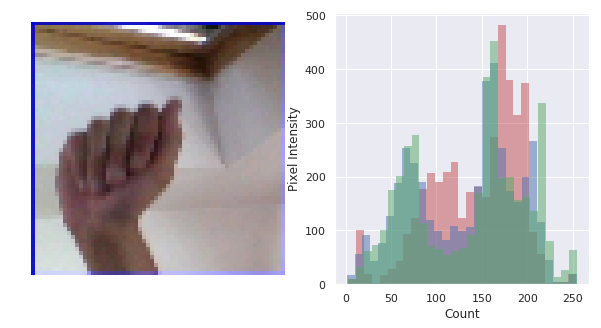

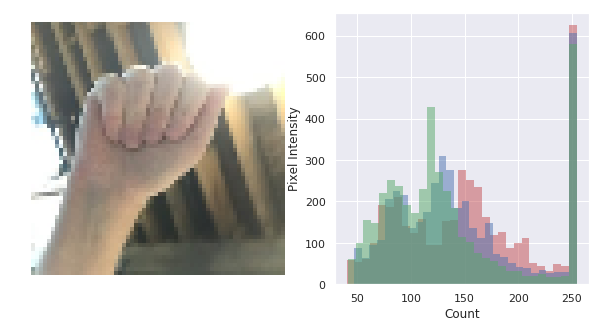

In [14]:
plot_pixels(final_train_img)
plot_pixels(final_test_img)

These are just random samples to compare pixel intensities - we can see the reds are more prevalent in the training set.

# Part 3: Modeling using CNN (Convolutional Neural Networks)

Below we'll set some global variables and create data generators.  This is an alternative (and simpler) method to load data, which will be used to fit to each model once compiled.

In [21]:
data_dir = train_dir
target_size = (64,64)
target_dims = (64,64,3)
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(rescale=1./255,
                                    samplewise_center=True,
                                    samplewise_std_normalization=True,
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size,
                                                    batch_size=batch_size, shuffle=True, subset='training')

val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size,
                                                  batch_size=batch_size, subset='validation')

steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

test_generator = data_augmentor.flow_from_directory(custom_test_dir,
                                                 target_size= target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False)



Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


Helper function to plot a confusion matrix - this will help us visualize which letters the network is getting mixed up most often when it misclassifies the output.

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return



def plot_confusion_matrix_with_default_options(y_pred, y_true, classes):
   
    cm = confusion_matrix(y_true, y_pred)
    with sns.axes_style('ticks'):
        plt.figure(figsize=(16, 16))
        plot_confusion_matrix(cm, classes)
        plt.show()
    return

Helper functions to evaluate model performance, the first testing accuracy against the custom test images (which are different from the validation set split off from the training set), the second to plot accuracy and loss (both training and validation) by epoch for each model.

In [31]:
def test_model_acc(model):
    steps=(870/batch_size)
    test_loss, test_acc = model.evaluate_generator(test_generator, steps=steps)
    y_hat_test = model.predict_generator(test_generator, steps=steps)
    
    #predictions = model.predict_generator(test_generator)
    y_pred = np.argmax(y_hat_test, axis=1)
    y_true = test_generator.classes
    
    plot_confusion_matrix_with_default_options(y_pred, y_true, classes)
    
    print('Generated {} predictions'.format(len(y_hat_test)))
    print('Custom Test Accuracy:', test_acc)
    return dict(y_pred=y_pred, y_true=y_true)
    
def plot_acc_and_loss(model_history):

    acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']

    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.subplots(figsize=(15,6))
    plt.subplot(121)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro--', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.subplot(122)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro--', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.show()
    
    return

## Optimization: Iterating through layer types and sizes

In [ ]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=target_dims))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(29))
            model.add(Activation('softmax'))
            
            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            start = datetime.datetime.now()


            history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_steps=validation_steps, epochs=10, validation_data=val_generator)
                      
            end = datetime.datetime.now()
            print("Total runtime for {} is {}".format(NAME, end-start))

Output is located here:
Link to [Notebook 2]('Modeling_draft.ipynb')  

The general takeaways were: 
- the more convolutional layers, the better the performance
- the larger the layer size, the better the performance
- include at least 1 dense layer (1 or 2 performed similarly)

Using this insight and via some additional tinkering, I chose the model architecture below and defined a function to compile, run, and test a CNN.  This takes optimizer and epoch parameters.  Output includes helper functions above to plot acc and loss, display test set accuracy, and plot confusion matrix.

In [32]:
def build_fit_test_cnn(optimizer, epochs):

    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3), strides = 1, activation='relu', 
                            input_shape=target_dims))
    model.add(Conv2D(64, (3,3), strides = 2, activation='relu'))
    
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, (3,3), strides = 1, activation='relu'))
    model.add(Conv2D(128, (3,3), strides = 2, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3,3), strides= 1, activation='relu'))
    model.add(Conv2D(256, (3,3), strides= 2, activation='relu'))

    model.add(Dropout(0.5))
   
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(29, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    
    start = datetime.datetime.now()
    
    history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                              validation_data = val_generator, validation_steps=validation_steps)
    
    
    model_name = "{}-optimizer-{}-epochs-".format(optimizer, epochs)
                       
    end = datetime.datetime.now()
    elapsed = end - start
    print('Total training time for model {}: {}'.format(model_name, elapsed))
                                
    test_model_acc(model)
    plot_acc_and_loss(history)
    
    
    return model_name, history.history                  

In [ ]:
optimizers = ['adam', 'Adagrad', 'Adadelta', 'Adamax']
epochs = [5,10]
for o in optimizers:
    for e in epochs:
        build_fit_test_cnn(o,e)
       
        

Output is located here:
Link to [Notebook 2](/'Modeling_draft.ipynb')  

Key takeaways after repeated runs:

- Adadelta optimizer consistently resulted in the highest validation accuracy
- Higher epochs typically yielded better results (lower loss, higher accuracy)


Epoch 1/10
1224/1224 [==============================] - 154s 126ms/step - loss: 1.8457 - accuracy: 0.4210 - val_loss: 0.6861 - val_accuracy: 0.7108
Epoch 2/10
1224/1224 [==============================] - 153s 125ms/step - loss: 0.4482 - accuracy: 0.8426 - val_loss: 0.4285 - val_accuracy: 0.8751
Epoch 3/10
1224/1224 [==============================] - 157s 129ms/step - loss: 0.2293 - accuracy: 0.9209 - val_loss: 0.4975 - val_accuracy: 0.8816
Epoch 4/10
1224/1224 [==============================] - 156s 127ms/step - loss: 0.1553 - accuracy: 0.9473 - val_loss: 0.1065 - val_accuracy: 0.9064
Epoch 5/10
1224/1224 [==============================] - 154s 126ms/step - loss: 0.1153 - accuracy: 0.9615 - val_loss: 0.4147 - val_accuracy: 0.9122
Epoch 6/10
1224/1224 [==============================] - 153s 125ms/step - loss: 0.0968 - accuracy: 0.9690 - val_loss: 0.1553 - val_accuracy: 0.9152
Epoch 7/10
1224/1224 [==============================] - 153s 125ms/step - loss: 0.0804 - accuracy: 0.9742 - val_

<Figure size 1152x1152 with 0 Axes>

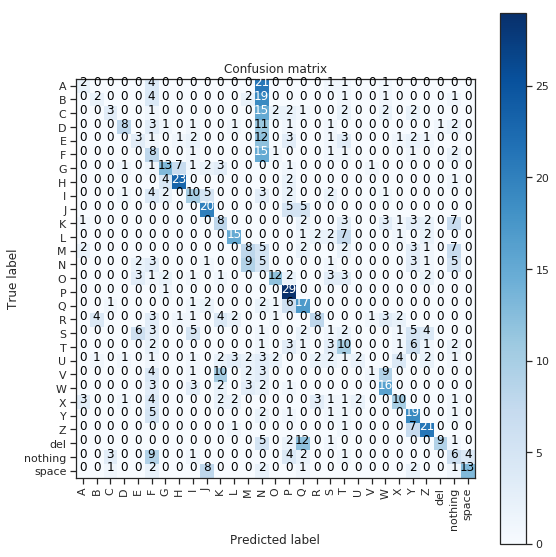

Generated 870 predictions
Custom Test Accuracy: 0.34712642431259155


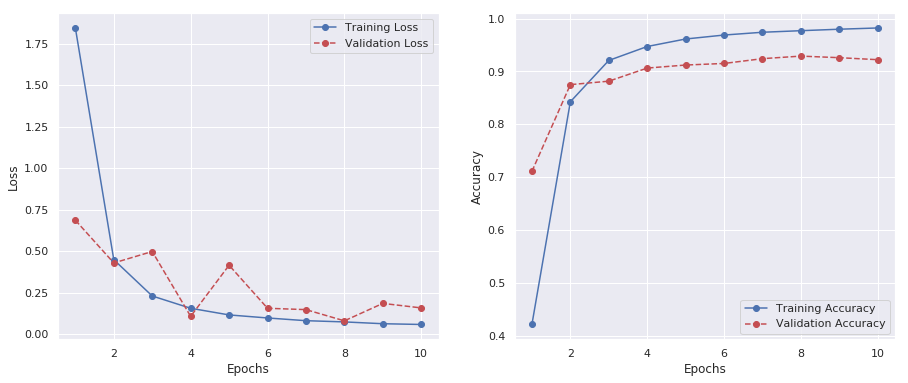

In [33]:
Adadelta_10 = build_fit_test_cnn('Adadelta',10)

In [34]:
#sanity check
print(Adadelta_10[0]) 
print(Adadelta_10[1])

Adadelta-optimizer-10-epochs-
{'val_loss': [0.6860649585723877, 0.42852115631103516, 0.4975125193595886, 0.10647344589233398, 0.4147258698940277, 0.1552867591381073, 0.14710530638694763, 0.07954487949609756, 0.18458275496959686, 0.15742111206054688], 'val_accuracy': [0.7108045816421509, 0.8750574588775635, 0.8816092014312744, 0.9064368009567261, 0.9121838808059692, 0.9151723980903625, 0.9242528676986694, 0.9290804862976074, 0.9260919690132141, 0.9222988486289978], 'loss': [1.845181587762455, 0.44806593714089227, 0.229345003092426, 0.15525837014918126, 0.11515498133645051, 0.09682182559593655, 0.08044051311991034, 0.07305770087097492, 0.06214695397526559, 0.05759005640132655], 'accuracy': [0.4209834, 0.84260535, 0.92086846, 0.94726694, 0.96148145, 0.96896553, 0.9742401, 0.9772031, 0.98, 0.9823627]}


I am increasing the batch size for the next run (something else I experimented with quite a bit):

In [36]:
data_dir = train_dir
target_size = (64,64)
target_dims = (64,64,3)
n_classes = 29
val_frac = 0.1
batch_size = 256

data_augmentor = ImageDataGenerator(samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size,
                                                    batch_size=batch_size, shuffle=True, subset='training')

val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size,
                                                  batch_size=batch_size, subset='validation')

steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

test_generator = data_augmentor.flow_from_directory(custom_test_dir,
                                                 target_size= target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False)



Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


## Transfer Learning: Leveraging a Pre-trained Network

In [37]:
cnn_base_16 = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))

cnn_base_16.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
______________________________________________________________

Freezing the pre-trained base first:

In [38]:
vgg16_model = Sequential()
vgg16_model.add(cnn_base_16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(n_classes, activation='softmax'))

cnn_base_16.trainable = False

for layer in vgg16_model.layers:
    print(layer.name, layer.trainable)

vgg16 False
flatten_7 True
dense_13 True
dense_14 True


Epoch 1/10
306/306 [==============================] - 149s 488ms/step - loss: 0.6186 - accuracy: 0.8521 - val_loss: 0.7099 - val_accuracy: 0.7967
Epoch 2/10
306/306 [==============================] - 144s 471ms/step - loss: 0.0939 - accuracy: 0.9827 - val_loss: 0.6549 - val_accuracy: 0.8215
Epoch 3/10
306/306 [==============================] - 143s 469ms/step - loss: 0.0448 - accuracy: 0.9922 - val_loss: 0.6788 - val_accuracy: 0.8382
Epoch 4/10
306/306 [==============================] - 143s 468ms/step - loss: 0.0253 - accuracy: 0.9963 - val_loss: 0.6479 - val_accuracy: 0.8409
Epoch 5/10
306/306 [==============================] - 143s 468ms/step - loss: 0.0186 - accuracy: 0.9972 - val_loss: 0.7512 - val_accuracy: 0.8340
Epoch 6/10
306/306 [==============================] - 144s 470ms/step - loss: 0.0129 - accuracy: 0.9980 - val_loss: 0.6407 - val_accuracy: 0.8470
Epoch 7/10
306/306 [==============================] - 144s 471ms/step - loss: 0.0090 - accuracy: 0.9988 - val_loss: 0.6589 -

<Figure size 1152x1152 with 0 Axes>

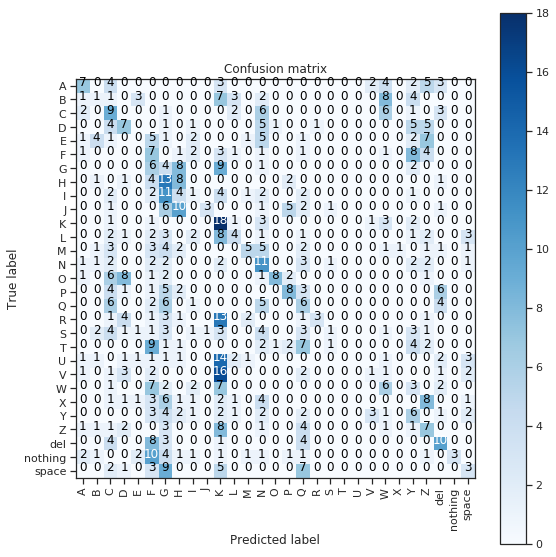

Generated 870 predictions
Custom Test Accuracy: 0.16896551847457886


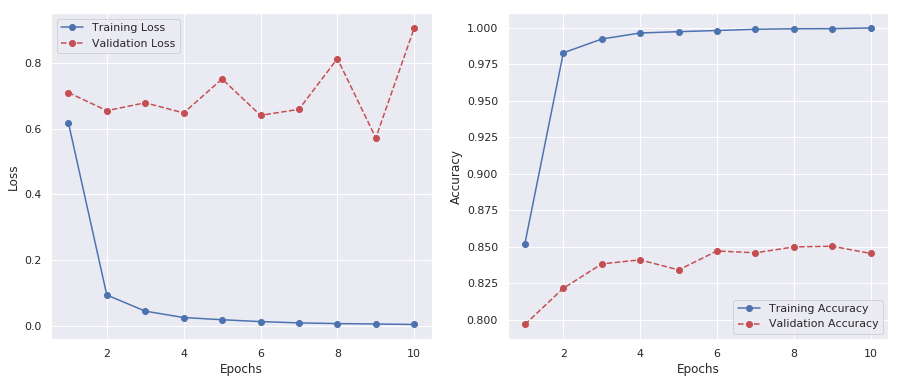

In [39]:
vgg16_model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

start = datetime.datetime.now()

vgg16_history = vgg16_model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_steps=validation_steps, epochs=10, validation_data=val_generator)

model_name = "VGG16 Frozen"
    
end = datetime.datetime.now()
elapsed = end - start
print('Total training time for model {}: {}'.format(model_name, elapsed))

test_model_acc(vgg16_model)
plot_acc_and_loss(vgg16_history)

Mediocre results at only about 17% accuracy on the real-world data.  Let's try unfreezing one of the convolutiional layers and then training it with additional epochs...

Epoch 1/20
306/306 [==============================] - 149s 486ms/step - loss: 2.3439 - accuracy: 0.3133 - val_loss: 0.5181 - val_accuracy: 0.8222
Epoch 2/20
306/306 [==============================] - 144s 470ms/step - loss: 0.2571 - accuracy: 0.9221 - val_loss: 0.6051 - val_accuracy: 0.8678
Epoch 3/20
306/306 [==============================] - 145s 474ms/step - loss: 0.2183 - accuracy: 0.9582 - val_loss: 0.2815 - val_accuracy: 0.9138
Epoch 4/20
306/306 [==============================] - 144s 469ms/step - loss: 0.2934 - accuracy: 0.9606 - val_loss: 0.3878 - val_accuracy: 0.9077
Epoch 5/20
306/306 [==============================] - 145s 473ms/step - loss: 0.0227 - accuracy: 0.9942 - val_loss: 0.2449 - val_accuracy: 0.9290
Epoch 6/20
306/306 [==============================] - 145s 475ms/step - loss: 0.0223 - accuracy: 0.9948 - val_loss: 0.4834 - val_accuracy: 0.8980
Epoch 7/20
306/306 [==============================] - 146s 476ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.4001 -

<Figure size 1152x1152 with 0 Axes>

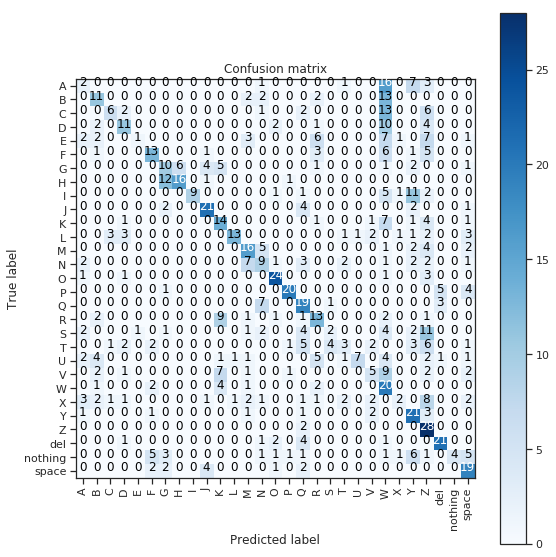

Generated 870 predictions
Custom Test Accuracy: 0.4137931168079376


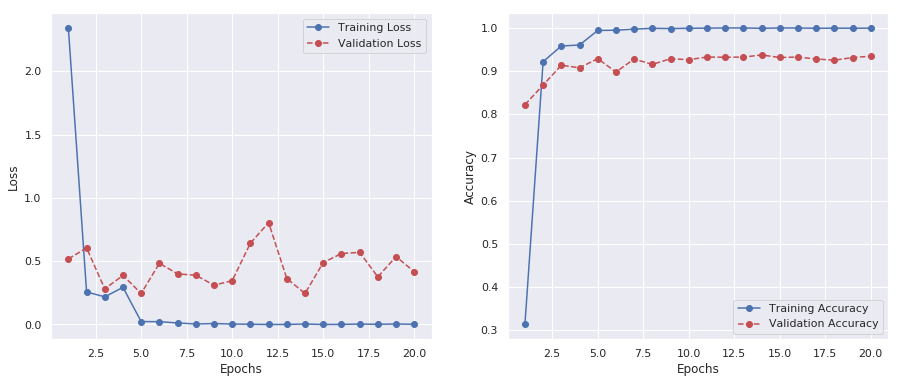

In [40]:

cnn_base_16.trainable = True
set_trainable = False
for layer in cnn_base_16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


        
vgg16_model = Sequential()
vgg16_model.add(cnn_base_16)
vgg16_model.add(Flatten())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dense(n_classes, activation='softmax'))        

vgg16_model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

start = datetime.datetime.now()

vgg16_history = vgg16_model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_steps=validation_steps, epochs=20, validation_data=val_generator)

model_name = "VGG16 with Unfrozen Layers"
    
end = datetime.datetime.now()
elapsed = end - start
print('Total training time for model {}: {}'.format(model_name, elapsed))

test_model_acc(vgg16_model)
plot_acc_and_loss(vgg16_history)

That's more like it given that we used a complex pre-trained network...our best result at just over 41%.

Epoch 1/10
306/306 [==============================] - 147s 480ms/step - loss: 2.7412 - accuracy: 0.1943 - val_loss: 1.9269 - val_accuracy: 0.3990
Epoch 2/10
306/306 [==============================] - 142s 464ms/step - loss: 1.1770 - accuracy: 0.6006 - val_loss: 0.9974 - val_accuracy: 0.7005
Epoch 3/10
306/306 [==============================] - 139s 456ms/step - loss: 0.5486 - accuracy: 0.8070 - val_loss: 0.5344 - val_accuracy: 0.7834
Epoch 4/10
306/306 [==============================] - 141s 462ms/step - loss: 0.3344 - accuracy: 0.8814 - val_loss: 0.3796 - val_accuracy: 0.8333
Epoch 5/10
306/306 [==============================] - 142s 463ms/step - loss: 0.2362 - accuracy: 0.9172 - val_loss: 0.5954 - val_accuracy: 0.8523
Epoch 6/10
306/306 [==============================] - 142s 465ms/step - loss: 0.1762 - accuracy: 0.9381 - val_loss: 0.4621 - val_accuracy: 0.8664
Epoch 7/10
306/306 [==============================] - 143s 467ms/step - loss: 0.1411 - accuracy: 0.9515 - val_loss: 0.4141 -

<Figure size 1152x1152 with 0 Axes>

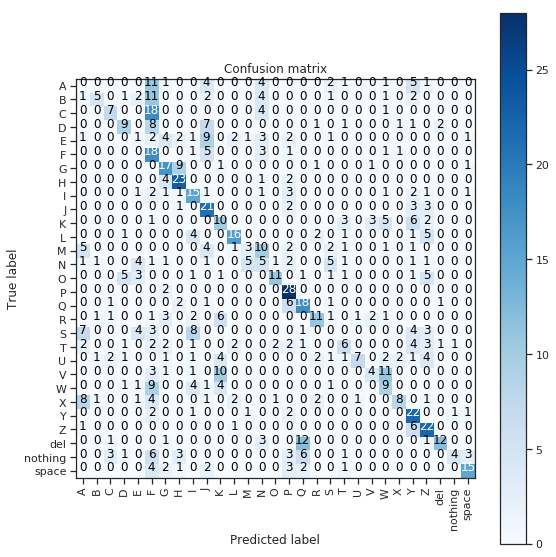

Generated 870 predictions
Custom Test Accuracy: 0.3758620619773865


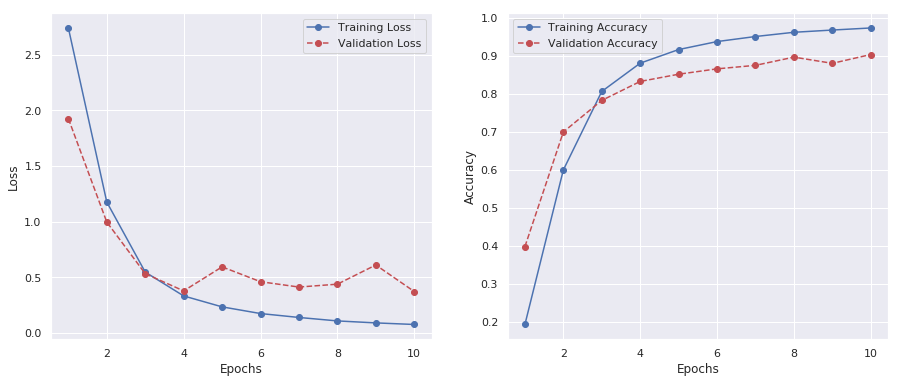

In [42]:
Adadelta_10_256 = build_fit_test_cnn('Adadelta', 10)

Epoch 1/15
306/306 [==============================] - 147s 482ms/step - loss: 2.7368 - accuracy: 0.1938 - val_loss: 1.9190 - val_accuracy: 0.3644
Epoch 2/15
306/306 [==============================] - 142s 462ms/step - loss: 1.1261 - accuracy: 0.6178 - val_loss: 0.9716 - val_accuracy: 0.6939
Epoch 3/15
306/306 [==============================] - 139s 455ms/step - loss: 0.5359 - accuracy: 0.8091 - val_loss: 0.7465 - val_accuracy: 0.8079
Epoch 4/15
306/306 [==============================] - 137s 447ms/step - loss: 0.3263 - accuracy: 0.8848 - val_loss: 0.4536 - val_accuracy: 0.8186
Epoch 5/15
306/306 [==============================] - 137s 446ms/step - loss: 0.2279 - accuracy: 0.9208 - val_loss: 0.6045 - val_accuracy: 0.8362
Epoch 6/15
306/306 [==============================] - 136s 444ms/step - loss: 0.1742 - accuracy: 0.9393 - val_loss: 0.4941 - val_accuracy: 0.8501
Epoch 7/15
306/306 [==============================] - 135s 442ms/step - loss: 0.1409 - accuracy: 0.9519 - val_loss: 0.4394 -

<Figure size 1152x1152 with 0 Axes>

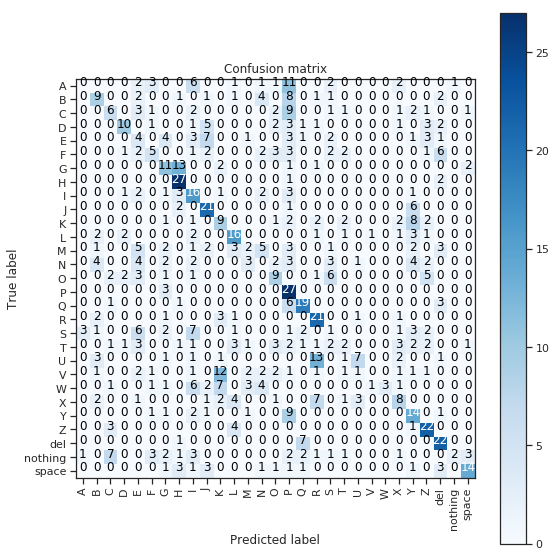

Generated 870 predictions
Custom Test Accuracy: 0.3528735637664795


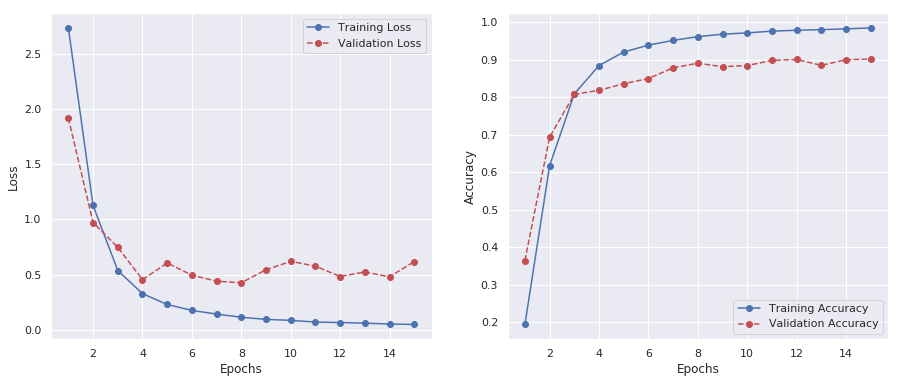

In [43]:
Adadelta_15_256 = build_fit_test_cnn('Adadelta', 15)

## Attempting Data Augmention for more robust training

In [44]:
datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode= "nearest",
     validation_split=val_frac)

#samplewise_center=True,
#samplewise_std_normalization=True

train_gen = datagen.flow_from_directory(data_dir, target_size=target_size,
                                                    batch_size=batch_size, shuffle=True, subset='training')

val_gen = datagen.flow_from_directory(data_dir, target_size=target_size,
                                                  batch_size=batch_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [45]:
def build_fit_test_cnn_2(optimizer, epochs):
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3), strides = 1, activation='relu', 
                            input_shape=target_dims))
    model.add(Conv2D(64, (3,3), strides = 2, activation='relu'))
    
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, (3,3), strides = 1, activation='relu'))
    model.add(Conv2D(128, (3,3), strides = 2, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3,3), strides= 1, activation='relu'))
    model.add(Conv2D(256, (3,3), strides= 2, activation='relu'))

    model.add(Dropout(0.5))
   
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(29, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    
    start = datetime.datetime.now()
    
    history = model.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                              validation_data = val_gen, validation_steps=validation_steps)
    
    model_name = "{}-optimizer-{}-epochs-".format(optimizer, epochs)
    
    end = datetime.datetime.now()
    elapsed = end - start
    print('Total training time for model {}: {}'.format(model_name, elapsed))
                                
    test_model_acc(model)
    plot_acc_and_loss(history)

Epoch 1/20
306/306 [==============================] - 235s 769ms/step - loss: 3.3542 - accuracy: 0.0441 - val_loss: 3.2214 - val_accuracy: 0.0654
Epoch 2/20
306/306 [==============================] - 222s 726ms/step - loss: 3.2040 - accuracy: 0.0853 - val_loss: 3.0126 - val_accuracy: 0.1078
Epoch 3/20
306/306 [==============================] - 221s 721ms/step - loss: 3.0342 - accuracy: 0.1207 - val_loss: 3.1534 - val_accuracy: 0.0922
Epoch 4/20
306/306 [==============================] - 219s 715ms/step - loss: 2.7654 - accuracy: 0.1810 - val_loss: 2.5213 - val_accuracy: 0.2138
Epoch 5/20
306/306 [==============================] - 225s 737ms/step - loss: 2.4217 - accuracy: 0.2593 - val_loss: 2.4023 - val_accuracy: 0.2479
Epoch 6/20
306/306 [==============================] - 221s 721ms/step - loss: 2.0891 - accuracy: 0.3460 - val_loss: 1.9780 - val_accuracy: 0.3341
Epoch 7/20
306/306 [==============================] - 218s 712ms/step - loss: 1.8056 - accuracy: 0.4192 - val_loss: 1.5673 -

<Figure size 1152x1152 with 0 Axes>

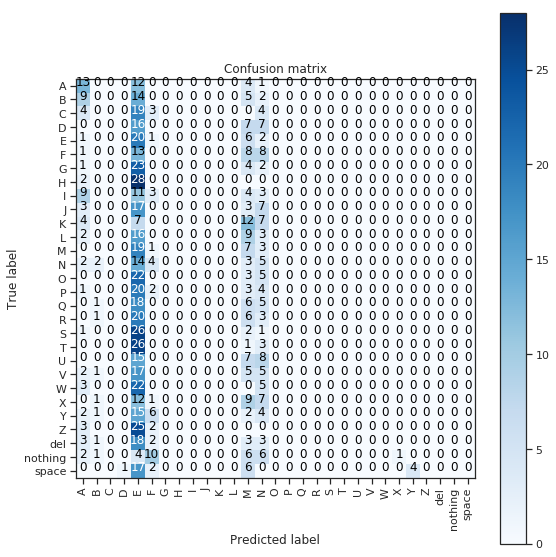

Generated 870 predictions
Custom Test Accuracy: 0.0517241396009922


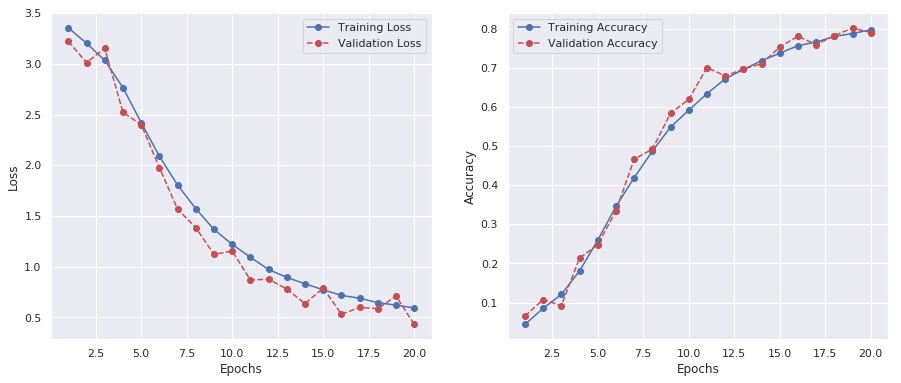

In [46]:
build_fit_test_cnn_2('Adadelta', 20)

The performance on the test set is quite poor here, just 5% (which is barely above the 3.5% you'd expect from a random guess with 29 classes).  

Let's try our original model with higher epochs and a higher batch size.

In [47]:
data_dir = train_dir
target_size = (64,64)
target_dims = (64,64,3)
n_classes = 29
val_frac = 0.1
batch_size = 256

data_augmentor = ImageDataGenerator(samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size,
                                                    batch_size=batch_size, shuffle=True, subset='training')

val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size,
                                                  batch_size=batch_size, subset='validation')

steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

test_generator = data_augmentor.flow_from_directory(custom_test_dir,
                                                 target_size= target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False)



Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


Epoch 1/20
306/306 [==============================] - 140s 457ms/step - loss: 2.7443 - accuracy: 0.1914 - val_loss: 2.1647 - val_accuracy: 0.2847
Epoch 2/20
306/306 [==============================] - 136s 445ms/step - loss: 1.1968 - accuracy: 0.5968 - val_loss: 0.8594 - val_accuracy: 0.6439
Epoch 3/20
306/306 [==============================] - 134s 439ms/step - loss: 0.5659 - accuracy: 0.8009 - val_loss: 0.7616 - val_accuracy: 0.7537
Epoch 4/20
306/306 [==============================] - 135s 442ms/step - loss: 0.3526 - accuracy: 0.8757 - val_loss: 0.6030 - val_accuracy: 0.8133
Epoch 5/20
306/306 [==============================] - 135s 443ms/step - loss: 0.2416 - accuracy: 0.9151 - val_loss: 0.4079 - val_accuracy: 0.8431
Epoch 6/20
306/306 [==============================] - 135s 440ms/step - loss: 0.1828 - accuracy: 0.9355 - val_loss: 0.6438 - val_accuracy: 0.8531
Epoch 7/20
306/306 [==============================] - 136s 444ms/step - loss: 0.1414 - accuracy: 0.9508 - val_loss: 0.3887 -

<Figure size 1152x1152 with 0 Axes>

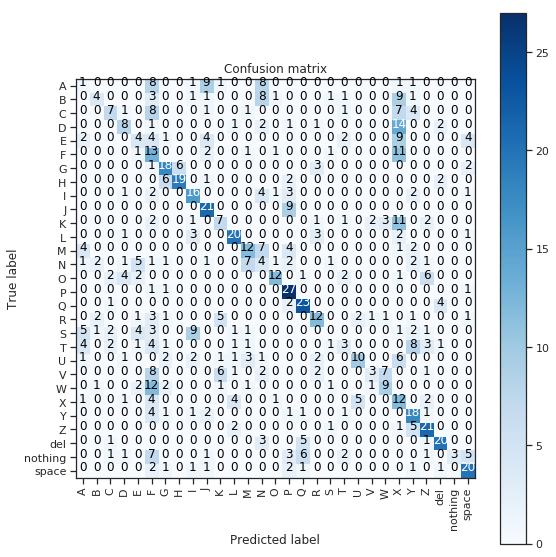

Generated 870 predictions
Custom Test Accuracy: 0.39885056018829346


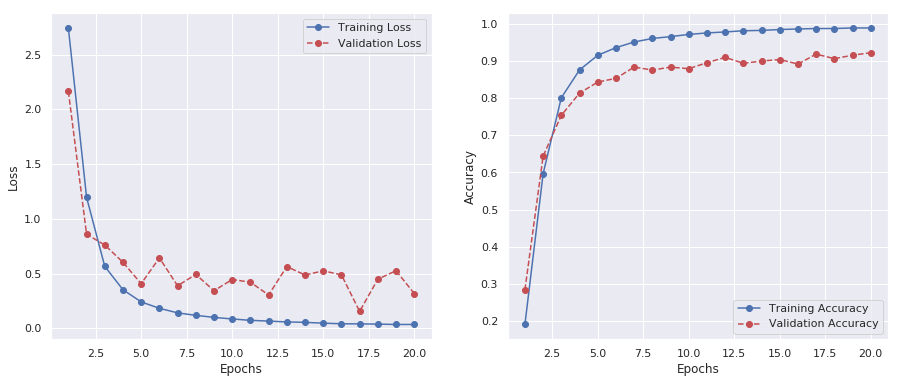

In [48]:
Adadelta_20_256 = build_fit_test_cnn('Adadelta', 20)

# Conclusion

We can see from the confusion matrix that certain letters are still quite challenging for the network - it often misclassifies other letters as "F" and "X", and confuses actual "A" and "B" for other letters frequently.

That said, this looks like our best result for the CNN we built...using an Adadelta optimizer, 20 epochs, and a 256 batch size gives us almost 40% accuracy.  There are a lot of other tuning possibilities (and different model architectures) that might further improve our performance, but for now I'm satisfied that we are on the right path and can feel confident that our network is getting a healthy number of predictions correct - not to mention the fact that it's right on par with the pre-trained network!